In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Conv2D, BatchNormalization, LeakyReLU, Input, Flatten, Dropout, Dense
from keras.optimizers import Adam
import pathlib
import os
import PIL
import cv2

In [2]:
train_data_link = "/kaggle/input/yikes-spiders-15-species/train"
val_data_link = "/kaggle/input/yikes-spiders-15-species/valid"
test_data_link = "/kaggle/input/yikes-spiders-15-species/test"

train_data = pathlib.Path(train_data_link)
val_data = pathlib.Path(val_data_link)
test_data = pathlib.Path(test_data_link)

In [3]:
list_of_classes = os.listdir("/kaggle/input/yikes-spiders-15-species/train")
print(list_of_classes)

['Peacock Spider', 'Huntsman Spider', 'Hobo Spider', 'Red Knee Tarantula', 'Golden Orb Weaver', 'Deinopis Spider', 'Black Widow', 'Brown Recluse Spider', 'Brown Grass Spider', 'Bold Jumper', 'Blue Tarantula', 'White Kneed Tarantula', 'Ladybird Mimic Spider', 'Yellow Garden Spider', 'Spiny-backed Orb-weaver']


In [4]:
def create_dict(c_dir, list_of_classes):
    dictionary = {}
    for spider in list_of_classes:
        t_list = list(c_dir.glob(f"{spider}/*"))
        dictionary[spider] = t_list
    return dictionary
    

In [5]:
train_total_dict = create_dict(train_data, list_of_classes)
val_total_dict = create_dict(val_data, list_of_classes)
test_total_dict = create_dict(test_data, list_of_classes)

In [6]:
len(train_total_dict)

15

In [7]:
train_total_dict["Peacock Spider"][:5]

[PosixPath('/kaggle/input/yikes-spiders-15-species/train/Peacock Spider/029.jpg'),
 PosixPath('/kaggle/input/yikes-spiders-15-species/train/Peacock Spider/014.jpg'),
 PosixPath('/kaggle/input/yikes-spiders-15-species/train/Peacock Spider/150.jpg'),
 PosixPath('/kaggle/input/yikes-spiders-15-species/train/Peacock Spider/109.jpg'),
 PosixPath('/kaggle/input/yikes-spiders-15-species/train/Peacock Spider/034.jpg')]

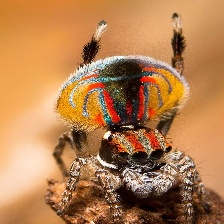

In [8]:
PIL.Image.open(str(train_total_dict["Peacock Spider"][0]))

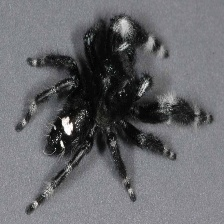

In [9]:
PIL.Image.open(str(train_total_dict["Bold Jumper"][0]))

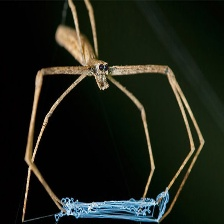

In [9]:
PIL.Image.open(str(train_total_dict["Deinopis Spider"][0]))

In [10]:
keys = list(train_total_dict.keys())
features = {}
poisoness = {}

for num, obj in enumerate(keys):
    features[obj] = num
    
for num, obj in enumerate(keys):
    if obj in ["Black Widow", "Brown Recluse Spider", "Hobo Spider"]:
        poisoness[obj] = 0
    elif obj in ["Golden Orb Weaver", "Huntsman Spider", "White Kneed Tarantula", "Red Knee Tarantula", "Blue Tarantula", "Spiny-backed Orb-weaver", "Blue Tarantula"]:
        poisoness[obj] = 1
    elif obj in ["Bold Jumper", "Deinopis Spider", "Ladybird Mimic Spider", "Peacock Spider", "Yellow Garden Spider", "Brown Grass Spider"]:
        poisoness[obj] = 2

In [11]:
features

{'Peacock Spider': 0,
 'Huntsman Spider': 1,
 'Hobo Spider': 2,
 'Red Knee Tarantula': 3,
 'Golden Orb Weaver': 4,
 'Deinopis Spider': 5,
 'Black Widow': 6,
 'Brown Recluse Spider': 7,
 'Brown Grass Spider': 8,
 'Bold Jumper': 9,
 'Blue Tarantula': 10,
 'White Kneed Tarantula': 11,
 'Ladybird Mimic Spider': 12,
 'Yellow Garden Spider': 13,
 'Spiny-backed Orb-weaver': 14}

In [12]:
poisoness

{'Peacock Spider': 2,
 'Huntsman Spider': 1,
 'Hobo Spider': 0,
 'Red Knee Tarantula': 1,
 'Golden Orb Weaver': 1,
 'Deinopis Spider': 2,
 'Black Widow': 0,
 'Brown Recluse Spider': 0,
 'Brown Grass Spider': 2,
 'Bold Jumper': 2,
 'Blue Tarantula': 1,
 'White Kneed Tarantula': 1,
 'Ladybird Mimic Spider': 2,
 'Yellow Garden Spider': 2,
 'Spiny-backed Orb-weaver': 1}

In [13]:
def split_data(main_data_dict, features_dict):
    x = []
    y_1 = []
    y_2 = []
    
    for name, images in main_data_dict.items():
        for image in images:
            image = cv2.imread(str(image))
            t_resized_image = cv2.resize(image, (256, 256))
            resized_image = cv2.cvtColor(t_resized_image, cv2.COLOR_BGR2RGB)
            x.append(resized_image)
            y_1.append(features_dict[name])
            y_2.append(poisoness[name])
    return x, y_1, y_2



x_train, y_train_1, y_train_2 = split_data(train_total_dict, features)
x_val, y_val_1, y_val_2 = split_data(val_total_dict, features)
x_test, y_test_1, y_test_2 = split_data(test_total_dict, features)

In [23]:
len(x_train), len(y_train_1), len(y_train_2)

(6555, 6555, 6555)

In [24]:
len(x_val), len(y_val_1), len(y_val_2)

(525, 525, 525)

In [21]:
len(x_test), len(y_test_1), len(y_test_2)

(75, 75, 75)

In [22]:
def make_longer(x, y1, y2, coef):
    return x * coef, y1 * coef, y2 * coef

x_train, y_train_1, y_train_2 = make_longer(x_train, y_train_1, y_train_2, 3)
x_val, y_val_1, y_val_2 = make_longer(x_val, y_val_1, y_val_2, 7)
    

In [15]:
danger_level = ["high", "meduim", "low"]

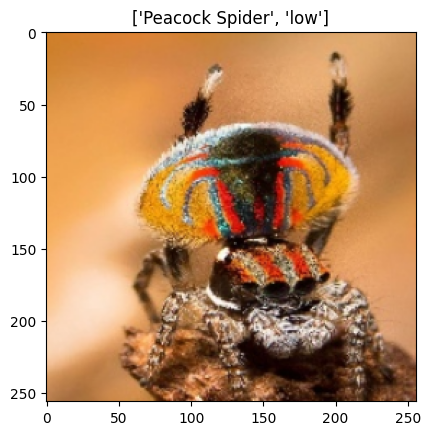

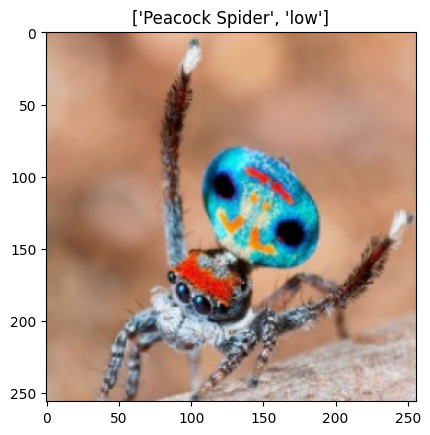

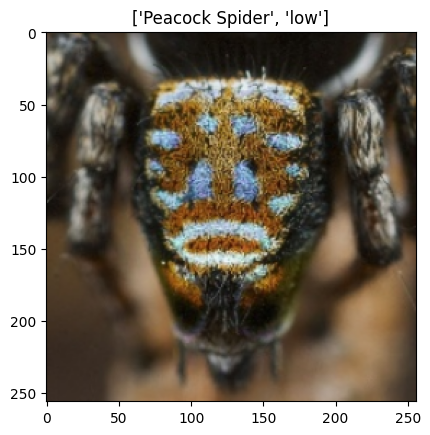

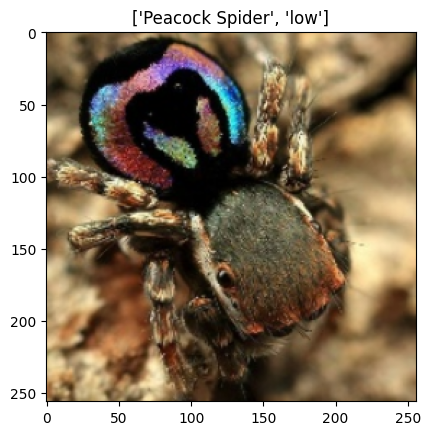

In [114]:
def output(x, y1, y2, num, lst1, lst2):
    for i in range(num):
        plt.imshow(x[i])
        plt.title([lst1[y1[i]], lst2[y2[i]]])
        plt.show()
        

output(x_train, y_train_1, y_train_2, 4, list_of_classes, danger_level)

In [26]:
# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, (y_train_1, y_train_2)))

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, {'output_1': y_train_1, 'output_2': y_train_2}))


In [33]:
len(list(train_dataset))

6555

In [ ]:
list(train_dataset)

In [25]:
len(x_train), len(y_train_1), len(y_train_2)

(6555, 6555, 6555)

In [120]:
# val_dataset = tf.data.Dataset.from_tensor_slices((x_val, (y_val_1, y_val_2 )))

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, {'output_1': y_val_1, 'output_2': y_val_2}))


In [56]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, (y_test_1, y_test_2)))

In [36]:
batch_size = 32 


train_dataset = train_dataset.batch(batch_size)
# val_dataset = val_dataset.batch(batch_size)
# test_dataset = test_dataset.batch(batch_size)


In [71]:
# def augment(image, labels):
#     label1, label2 = labels  
#     image = tf.image.random_flip_left_right(image)  
#     image = tf.image.random_brightness(image, max_delta=0.1)  
#     image = tf.image.random_contrast(image, 0.8, 1.2)  
#     return image, (label1, label2)


# train_dataset = train_dataset.map(augment)
# val_dataset = val_dataset.map(augment)

In [37]:
heigh = 256
width = 256
channels = 3

# 256, 256, 3
inputs = Input(shape=(heigh, width, channels))

x = Conv2D(32, (3, 3), padding="same", strides=2)(inputs)
x = LeakyReLU()(x)

# 128, 128, 32

x = Conv2D(64, (3, 3), padding="same", strides=2)(x)
x = LeakyReLU()(x)

# 64, 64, 64

x = Conv2D(64, (3, 3), padding="same", strides=2)(x)
x = LeakyReLU()(x)

# 32, 32, 64

x = Conv2D(128, (3, 3), padding="same", strides=2)(x)
x = LeakyReLU()(x)

# 16, 16, 128

x = Conv2D(128, (3, 3), padding="same", strides=2)(x)
x = LeakyReLU()(x)

# 8, 8, 128

x = Flatten()(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

# 8192

x = Dense(4096)(x)
x = LeakyReLU()(x)

x = Dense(2048)(x)
x = LeakyReLU()(x)

x = Dense(1024)(x)
x = LeakyReLU()(x)

x = Dense(512)(x)
x = LeakyReLU()(x)

x = Dense(256)(x)
x = LeakyReLU()(x)

x = Dense(128)(x)
x = LeakyReLU()(x)

x = Dense(64)(x)
x = LeakyReLU()(x)

x = Dense(32)(x)
x = LeakyReLU()(x)

x = Dense(16)(x)
x = LeakyReLU()(x)

out_1 = Dense(15, activation="softmax", name='output_1')(x)

x = Dense(8)(x)
x = LeakyReLU()(x)


x = Dense(4)(x)
x = LeakyReLU()(x)


out_2 = Dense(3, activation="softmax", name='output_2')(x)

model = Model(inputs=inputs, outputs=[out_1, out_2])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     18,496 │ leaky_re_lu[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │     36,928 │ leaky_re_lu_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 32, 32,    │          0 │ conv2d_2[0][0]    │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 16, 16,    │     73,856 │ leaky_re_lu_2[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 16, 16,    │          0 │ conv2d_3[0][0]    │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 8, 8, 128) │    147,584 │ leaky_re_lu_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 8, 8, 128) │          0 │ conv2d_4[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8192)      │          0 │ leaky_re_lu_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 8192)      │     32,768 │ flatten[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 8192)      │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 4096)      │ 33,558,528 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 4096)      │          0 │ dense[0][0]       │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 2048)      │  8,390,656 │ leaky_re_lu_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_6       │ (None, 2048)      │          0 │ dense_1[0][0]     │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 45,058,218 (171.88 MB)

 Trainable params: 45,041,834 (171.82 MB)

 Non-trainable params: 16,384 (64.00 KB)

In [38]:
model.compile(optimizer=Adam(learning_rate=1e-2),
             loss={"output_1": "sparse_categorical_crossentropy", "output_2": "sparse_categorical_crossentropy"},
             metrics={"output_1": "accuracy", "output_2": "accuracy"})

In [117]:
x_train = np.array(x_train)
y_train_1 = np.array(y_train_1)
y_train_2 = np.array(y_train_2)

x_val = np.array(x_val)
y_val_1 = np.array(y_val_1)
y_val_2 = np.array(y_val_2)

In [118]:
model.fit(x_train, [y_train_1, y_train_2], validation_data=(x_val, [y_val_1, y_val_2]), epochs=10)

Epoch 1/10


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [128]:
print(y_train_1.shape)
print(y_train_2.shape)


(6555,)
(6555,)


In [122]:
for x_batch, y_batch in train_dataset.take(1):
    print(x_batch.shape)
    print({key: value.shape for key, value in y_batch.items()})


(256, 256, 3)
{'output_1': TensorShape([]), 'output_2': TensorShape([])}


In [41]:
train_dataset = train_dataset.unbatch()  # Разбиваем лишний уровень батча, если он есть
train_dataset = train_dataset.batch(batch_size)
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 256, 256, 3), dtype=tf.uint8, name=None), {'output_1': TensorSpec(shape=(None, None), dtype=tf.int32, name=None), 'output_2': TensorSpec(shape=(None, None), dtype=tf.int32, name=None)})>

In [39]:
model.fit(train_dataset, epochs=100)

Epoch 1/100


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(None, None, 256, 256, 3)